In [1]:
import gym
from stable_baselines3 import PPO, DQN
from datetime import datetime
from gym.wrappers import TimeLimit


In [2]:
side_length = 7
env = gym.make("gym_xymodel:isingmodel-v0", side_len=side_length)
env = TimeLimit(env, max_episode_steps=100)
# env = gym.make('CartPole-v1')

In [4]:
date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
folder_path = f"../results/ising/{date}_{side_length}x{side_length}"
model = PPO("MlpPolicy", env, tensorboard_log=folder_path)
model.learn(total_timesteps=1_000_000)
model.save(f"{folder_path}/model")

In [13]:
model = PPO.load("results/2022-02-20_00-02-28_isingmodelSB_3x3")

reward=8
[[-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]]


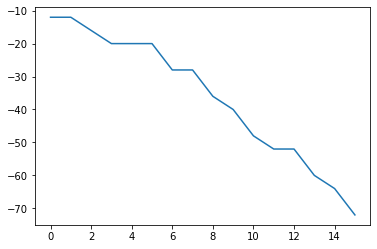

In [84]:
energies = []
obs = env.reset()
for i in range(200):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    energies.append(info["energy"])
    if done:
      print(f"{reward=}")
      env.render()
      break
      # env.reset()
    # if i % 100 == 0:
    #   print(f"{i=}, {reward=}")
    #   env.render()

import matplotlib.pyplot as plt
plt.plot(range(len(energies)),energies)

In [65]:
obs = env.reset()
env.render()
for i in range(10):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    print(f"{i=}, {action=} {reward=}, {env.compute_energy()=}")
    env.render()

[[ 1  1 -1 -1  1]
 [ 1 -1 -1 -1  1]
 [-1 -1 -1  1  1]
 [ 1  1  1  1 -1]
 [ 1  1  1 -1 -1]]
i=0, action=2 reward=-40, env.compute_energy()=-10
[[ 1  1  1 -1  1]
 [ 1 -1 -1 -1  1]
 [-1 -1 -1  1  1]
 [ 1  1  1  1 -1]
 [ 1  1  1 -1 -1]]
i=1, action=23 reward=0, env.compute_energy()=-10
[[ 1  1  1 -1  1]
 [ 1 -1 -1 -1  1]
 [-1 -1 -1  1  1]
 [ 1  1  1  1 -1]
 [ 1  1  1  1 -1]]
i=2, action=19 reward=4, env.compute_energy()=-14
[[ 1  1  1 -1  1]
 [ 1 -1 -1 -1  1]
 [-1 -1 -1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1 -1]]
i=3, action=24 reward=8, env.compute_energy()=-22
[[ 1  1  1 -1  1]
 [ 1 -1 -1 -1  1]
 [-1 -1 -1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]
i=4, action=10 reward=4, env.compute_energy()=-26
[[ 1  1  1 -1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1 -1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]
i=5, action=8 reward=0, env.compute_energy()=-26
[[ 1  1  1 -1  1]
 [ 1 -1 -1  1  1]
 [ 1 -1 -1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]
i=6, action=3 reward=8, env.compute_energy()=-34
[[ 1  1  1  1 